In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file_path = "final_nnp.csv"

In [3]:
df = pd.read_csv(file_path,encoding='utf-8')

In [4]:
df.shape

(24707, 3)

In [5]:
df.groupby("rating").rating.count()

rating
negative    9055
neutral     8171
positive    7481
Name: rating, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24707 entries, 0 to 24706
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24707 non-null  int64 
 1   rating      24707 non-null  object
 2   content     24707 non-null  object
dtypes: int64(1), object(2)
memory usage: 579.2+ KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
rating        0
content       0
dtype: int64

## Preprocessing

In [8]:
from bs4 import BeautifulSoup
df['content'] = df['content'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())
df['content'] = df['content'].str.replace('\n', '')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14540\2570581559.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['content'] = df['content'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())


In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [10]:
words = stopwords.words("english")
print(len(words))
remove_words = ['aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'don', "don't", 'should', "should've", 'no', 'nor', 'not',"but", 'do', 'does', 'did', 'doing']
new_list = [i for i in words if i not in remove_words]
print(new_list)
print(len(new_list))
# stopwords is inside new_list


179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'a', 'an', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'now',

In [11]:
df.head()

,Unnamed: 0,rating,content
0,19603,positive,"This movie won audience choice in Calgary, but..."
1,5345,positive,I had the honor of watching TDK during a scree...
2,9406,positive,One of the best I've ever seen.The movie had t...
3,9051,neutral,I read Stephen King's The Green Mile long befo...
4,24325,neutral,Far and away the most overrated film of all ti...


In [12]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,rating,content
0,positive,"This movie won audience choice in Calgary, but..."
1,positive,I had the honor of watching TDK during a scree...
2,positive,One of the best I've ever seen.The movie had t...
3,neutral,I read Stephen King's The Green Mile long befo...
4,neutral,Far and away the most overrated film of all ti...


# Visualization

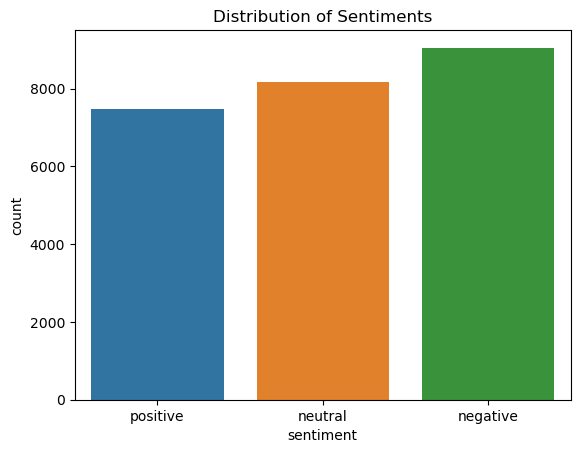

In [14]:
sns.countplot(x='rating', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()


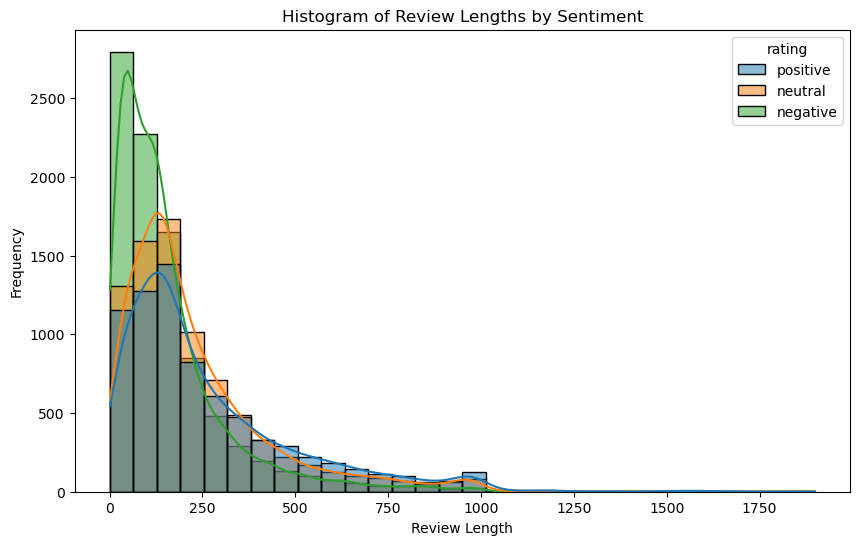

In [15]:
# Histogram of Review Lengths
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='content_length', hue='rating', bins=30, kde=True)
plt.title('Histogram of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


nltk.download('punkt')


porter_stemmer = PorterStemmer()

def remove_special_char(x):
    return re.sub("[^a-zA-Z_]", " ", x)

def stop_words_removal(x):
    clean_data = []
    for i in x.split(): #tokenize
        if i.strip().lower() not in new_list:
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(x):
    x = re.sub(r"won\'t", "would not", x)
    x = re.sub(r"can\'t", "can not", x)
    x = re.sub(r"don\'t", "do not", x)
    x = re.sub(r"shouldn\'t", "should not", x)
    x = re.sub(r"needn\'t", "need not", x)
    x = re.sub(r"hasn\'t", "has not", x)
    x = re.sub(r"haven\'t", "have not", x)
    x = re.sub(r"weren\'t", "were not", x)
    x = re.sub(r"mightn\'t", "might not", x)
    x = re.sub(r"didn\'t", "did not", x)
    x = re.sub(r"isn\'t", "is not", x)
    x = re.sub(r"\'re", "are", x)
    x = re.sub(r"\'s", "is", x)
    x = re.sub(r"\'d", "would", x)
    x = re.sub(r"\'ll", "will", x)
    x = re.sub(r"\'t", "not", x)
    x = re.sub(r"\'ve", "have", x)
    x = re.sub(r"\'m", "am", x)
    return x

def stemming(x):
    return ' '.join([porter_stemmer.stem(word) for word in x.split()])

def cleaning(x):

    x = contraction_expansion(x)

    x = remove_special_char(x)

    x = stop_words_removal(x)

    x = stemming(x)

    return x


df["content"] = df["content"].apply(cleaning)

# Splitting and Training

In [26]:
X = df["content"]
Y = df["rating"]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 2)


In [28]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train)
print(X_test)

  (0, 1666)	0.08346358658243398
  (0, 32209)	0.12972706394355749
  (0, 29378)	0.08951729180309223
  (0, 36286)	0.0690193673701657
  (0, 13322)	0.13066634245694608
  (0, 3914)	0.09713531390639266
  (0, 15754)	0.1719259982600924
  (0, 17770)	0.1673728226446867
  (0, 6103)	0.14670427161565253
  (0, 29928)	0.12139616793501996
  (0, 32144)	0.1673728226446867
  (0, 22121)	0.14359799647521101
  (0, 10531)	0.21713043003237753
  (0, 12540)	0.11151164578818991
  (0, 6050)	0.12333015037326224
  (0, 21038)	0.1039662012821928
  (0, 5315)	0.10986961522272846
  (0, 14770)	0.14931710459268602
  (0, 24633)	0.14096679400439222
  (0, 31707)	0.1417681459340517
  (0, 34649)	0.07968915236940756
  (0, 19079)	0.10128281677376061
  (0, 11190)	0.15965273448304676
  (0, 27396)	0.08438739036793105
  (0, 17954)	0.09033448784543881
  :	:
  (19764, 24890)	0.3376437797823649
  (19764, 7057)	0.2760098330525613
  (19764, 32557)	0.24933442756723034
  (19764, 10323)	0.19661672126610952
  (19764, 13549)	0.1605124701421545

# RBF kernel with one vs one approach

In [29]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import LabelEncoder

# Converting the labels into numeric value
# Here, negative: 0 , neutral: 1, positive: 2
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

svm_model = SVC(kernel='rbf', decision_function_shape='ovo')
model_one = OneVsOneClassifier(svm_model)


model_one.fit(X_train, Y_train_encoded)

X_train_prediction = model_one.predict(X_train)
training_accuracy = accuracy_score(Y_train_encoded, X_train_prediction)
print("Training accuracy: ", training_accuracy)

X_test_prediction = model_one.predict(X_test)
test_accuracy = accuracy_score(Y_test_encoded, X_test_prediction)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.9612952188211485
Test accuracy:  0.7045730473492513


# Training model with linear kernel with one vs one approach

In [30]:
svm_model_two = SVC(kernel='linear', decision_function_shape='ovo')
model_two = OneVsOneClassifier(svm_model_two)

model_two.fit(X_train, Y_train_encoded)


X_train_prediction = model_two.predict(X_train)
training_accuracy = accuracy_score(Y_train_encoded, X_train_prediction)
print("Training accuracy: ", training_accuracy)


X_test_prediction = model_two.predict(X_test)
test_accuracy = accuracy_score(Y_test_encoded, X_test_prediction)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.8600050594485201
Test accuracy:  0.6958721165520032


# Training model with polynomial kernel with one vs one approach

In [33]:
svm_model_three = SVC(kernel='poly', decision_function_shape='ovo')


model_three = OneVsOneClassifier(svm_model_three)


model_three.fit(X_train, Y_train_encoded)


X_train_prediction = model_three.predict(X_train)
training_accuracy = accuracy_score(Y_train_encoded, X_train_prediction)
print("Training accuracy: ", training_accuracy)


X_test_prediction = model_three.predict(X_test)
test_accuracy = accuracy_score(Y_test_encoded, X_test_prediction)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.9988363268403744
Test accuracy:  0.6636989073249696


# RBF kernel with one vs rest approach

In [42]:
svm_model_four = SVC(kernel='rbf', decision_function_shape='ovr')

svm_model_four.fit(X_train, Y_train_encoded)

X_train_prediction = svm_model_four.predict(X_train)
training_accuracy = accuracy_score(Y_train_encoded, X_train_prediction)
print("Training accuracy: ", training_accuracy)

X_test_prediction = svm_model_four.predict(X_test)
test_accuracy = accuracy_score(Y_test_encoded, X_test_prediction)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.9616493802175563
Test accuracy:  0.7029542695265075


# Linear kernel with one vs rest approach

In [43]:
svm_model_five = SVC(kernel='linear', decision_function_shape='ovr')

svm_model_five.fit(X_train, Y_train_encoded)

X_train_prediction = svm_model_five.predict(X_train)
training_accuracy = accuracy_score(Y_train_encoded, X_train_prediction)
print("Training accuracy: ", training_accuracy)

X_test_prediction = svm_model_five.predict(X_test)
test_accuracy = accuracy_score(Y_test_encoded, X_test_prediction)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.8599038704781179
Test accuracy:  0.6948603804127883


# Polynomial kernel with one vs rest approach

In [39]:
svm_model_six = SVC(kernel='poly', decision_function_shape='ovr')

svm_model_six.fit(X_train, Y_train_encoded)

X_train_prediction = svm_model_six.predict(X_train)
training_accuracy = accuracy_score(Y_train_encoded, X_train_prediction)
print("Training accuracy: ", training_accuracy)

X_test_prediction = svm_model_six.predict(X_test)
test_accuracy = accuracy_score(Y_test_encoded, X_test_prediction)
print("Test accuracy: ", test_accuracy)

Training accuracy:  0.9988363268403744
Test accuracy:  0.6639012545528127


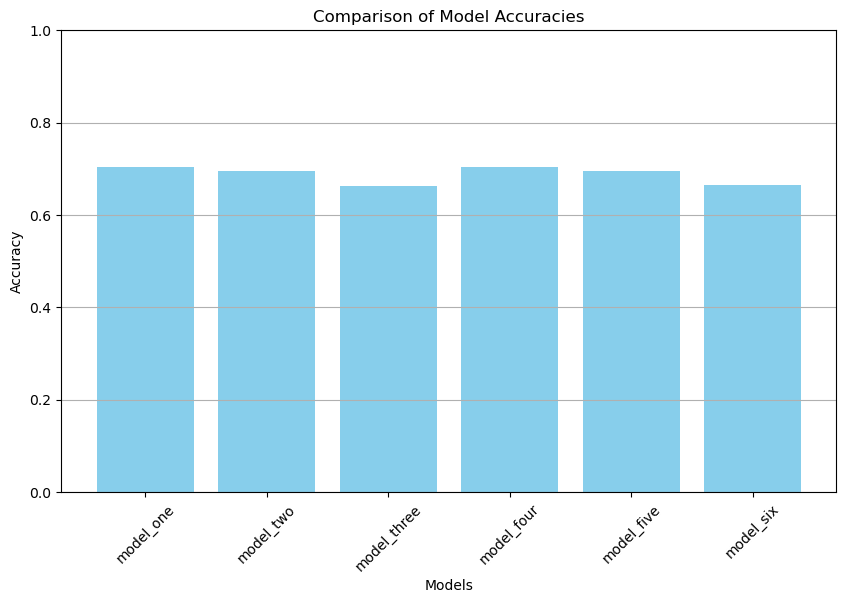

In [45]:
import matplotlib.pyplot as plt

# List of model names
models = ['model_one', 'model_two', 'model_three', 'model_four', 'model_five', 'model_six']

# List of accuracies for each model
accuracies = [0.7045, 0.6958, 0.6636, 0.7029, 0.6948, 0.6639]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()


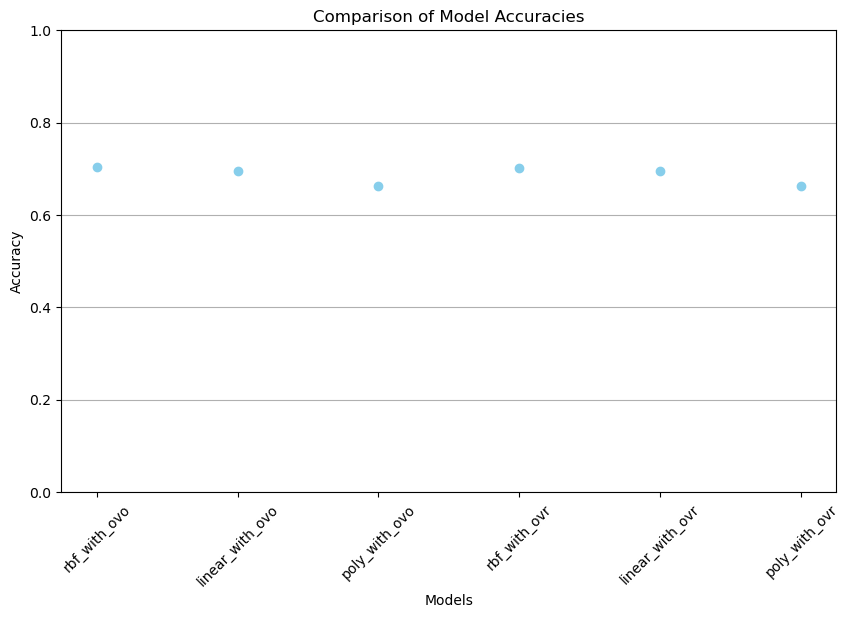

In [47]:
import matplotlib.pyplot as plt


models = ['rbf_with_ovo', 'linear_with_ovo', 'poly_with_ovo', 'rbf_with_ovr', 'linear_with_ovr', 'poly_with_ovr']


accuracies = [0.7045, 0.6958, 0.6636, 0.7029, 0.6948, 0.6639]


plt.figure(figsize=(10, 6))
plt.scatter(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()


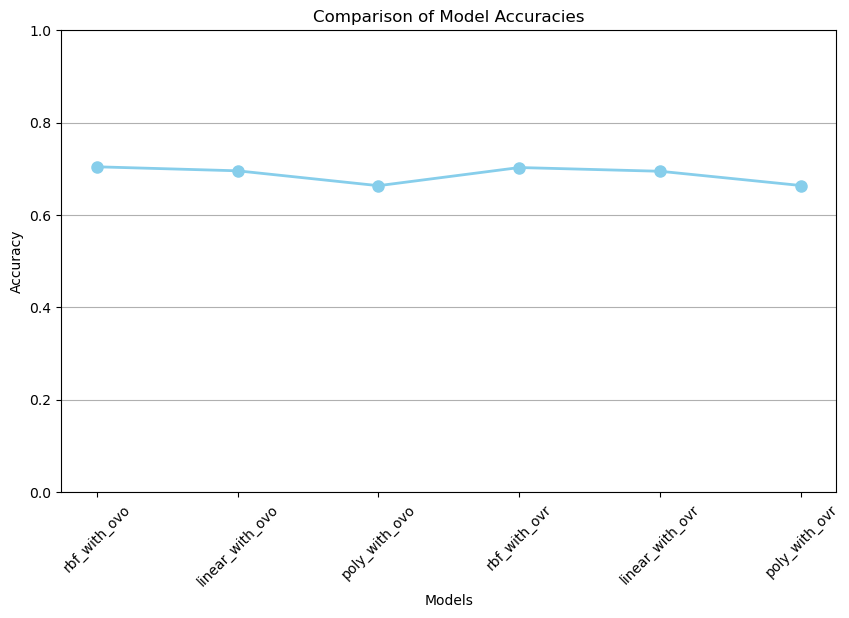

In [48]:
import matplotlib.pyplot as plt

models = ['rbf_with_ovo', 'linear_with_ovo', 'poly_with_ovo', 'rbf_with_ovr', 'linear_with_ovr', 'poly_with_ovr']

accuracies = [0.7045, 0.6958, 0.6636, 0.7029, 0.6948, 0.6639]


plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', color='skyblue', linewidth=2, markersize=8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1) 
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()


In [50]:
X_test_prediction_one = model_one.predict(X_test)
test_accuracy_one = accuracy_score(Y_test_encoded, X_test_prediction_one)
print("Test accuracy: ", test_accuracy_one)

Test accuracy:  0.7045730473492513


In [56]:
from sklearn.metrics import classification_report

print("Classification Report - Testing Data:")
print(classification_report(Y_test_encoded, X_test_prediction))

Classification Report - Testing Data:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1811
           1       0.58      0.58      0.58      1635
           2       0.73      0.76      0.75      1496

    accuracy                           0.69      4942
   macro avg       0.69      0.69      0.69      4942
weighted avg       0.70      0.69      0.70      4942



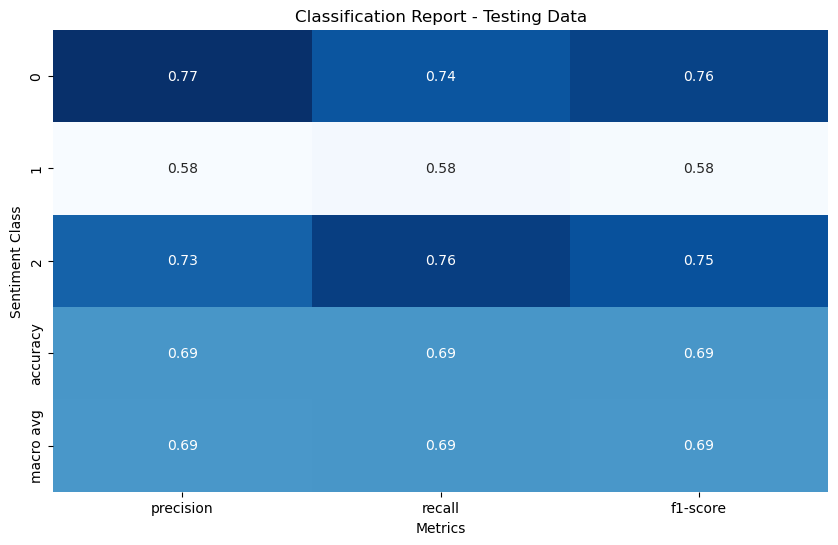

In [61]:
report = classification_report(Y_test_encoded, X_test_prediction, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title('Classification Report - Testing Data')
plt.xlabel('Metrics')
plt.ylabel('Sentiment Class')
plt.show()

In [66]:
review = input("Enter review = ")
review_cleaned = cleaning(review)
print("\nCleaned Input Sentence:", review_cleaned)
review_vectorized = vectorizer.transform([review_cleaned])
predict_review_senti = model_one.predict(review_vectorized)
print("Predicted sentiment = ", predict_review_senti[0])







Enter review = worst movie.

Cleaned Input Sentence: worst movi
Predicted sentiment =  0


In [ ]:
import pickle

# Save vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Save model
with open('model.pkl', 'wb') as file:
    pickle.dump(model_one, file)


